##### Figure S5, Table S6: linkage disequilibrium

In [1]:
from collections import defaultdict
import dask.array as da
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import allel
import seaborn as sns

import ingenos

In [2]:
base_path = "/overflow/dschridelab/users/rrlove/aedes/"
results_path = f"{base_path}results/"
linkage_path = f"{results_path}popgen/LD/windowed/"

##### read in the data

In [3]:
chroms = ["AaegL5_1", "AaegL5_2", "AaegL5_3"]

countries = ["Colombia", "Brazil", "USA", "Gabon", "Kenya", "Senegal"]

In [4]:
ld_dict = defaultdict(lambda: defaultdict(dict))

for chrom in chroms:
    
    for country in countries:
    
        in_list = []
        
        in_paths = \
        glob.glob(
            f"{linkage_path}100kb/{country}/windowed_LD_{chrom}_{country}_" + \
            "*_nonoverlapping_no_relatives.122322.tsv")
        
        for path in np.sort(in_paths):
            
            chunk = pd.read_table(path)
            
            chunk["start_pos"] = pd.Series(
            [int(item[0].lstrip("(")) for item in chunk["windows"].str.split(",")])
            
            chunk["end_pos"] = pd.Series(
            [int(item[1].rstrip(")")) for item in chunk["windows"].str.split(",")])
            
            chunk["chrom"] = chrom
            
            chunk["country"] = country
            
            chunk.sort_values("start_pos", inplace=True)
            
            in_list.append(chunk[["chrom", "start_pos", "end_pos", "n_sites", "r2", "country"]])
            
        ld_dict[chrom][country] = pd.concat(in_list)

In [5]:
chunk.head()

,r2,windows,n_sites,start_pos,end_pos,chrom,country
0,0.009513,"(400000053, 400100052)",3610,400000053,400100052,AaegL5_3,Senegal
1,0.006536,"(400100053, 400200052)",4938,400100053,400200052,AaegL5_3,Senegal
2,0.006536,"(400200053, 400300052)",4246,400200053,400300052,AaegL5_3,Senegal
3,0.009070,"(400300053, 400400052)",3589,400300053,400400052,AaegL5_3,Senegal
4,0.006536,"(400400053, 400500052)",3358,400400053,400500052,AaegL5_3,Senegal


##### plot the distribution

In [6]:
for country in countries:
    
    by_country_list = []
    
    for chrom in chroms:
        
        df = ld_dict[chrom][country]
        
        by_country_list.append(df)
        
        print(chrom, country, "mean LD is: ", np.mean(df["r2"]))

    print(country, "mean overall LD is: ", 
          np.nanmean(pd.concat(by_country_list)["r2"]))
    print(country, "median overall LD is: ", 
          np.nanmedian(pd.concat(by_country_list)["r2"]), "\n")

AaegL5_1 Colombia mean LD is:  0.015008255146401465
AaegL5_2 Colombia mean LD is:  0.015489795965823285
AaegL5_3 Colombia mean LD is:  0.015089982570580569
Colombia mean overall LD is:  0.015228892480589253
Colombia median overall LD is:  0.014778324402868748 

AaegL5_1 Brazil mean LD is:  0.036693437169338476
AaegL5_2 Brazil mean LD is:  0.03957079063352161
AaegL5_3 Brazil mean LD is:  0.03738606521262313
Brazil mean overall LD is:  0.03809328348789447
Brazil median overall LD is:  0.03559788316488266 

AaegL5_1 USA mean LD is:  0.014390268577905709
AaegL5_2 USA mean LD is:  0.01451859725979198
AaegL5_3 USA mean LD is:  0.014877304232089031
USA mean overall LD is:  0.014607613913487486
USA median overall LD is:  0.014736841432750225 

AaegL5_1 Gabon mean LD is:  0.021978801917628233
AaegL5_2 Gabon mean LD is:  0.021486005738658963
AaegL5_3 Gabon mean LD is:  0.021811627435526514
Gabon mean overall LD is:  0.021723904198820223
Gabon median overall LD is:  0.02150538004934788 

AaegL5_1

In [7]:
outString = ingenos.make_date_stamp(
    results_path + "popgen/LD/figures/LD_by_chrom_and_country", ".pdf")

outString

'/overflow/dschridelab/users/rrlove/aedes/results/popgen/LD/figures/LD_by_chrom_and_country.020923.pdf'

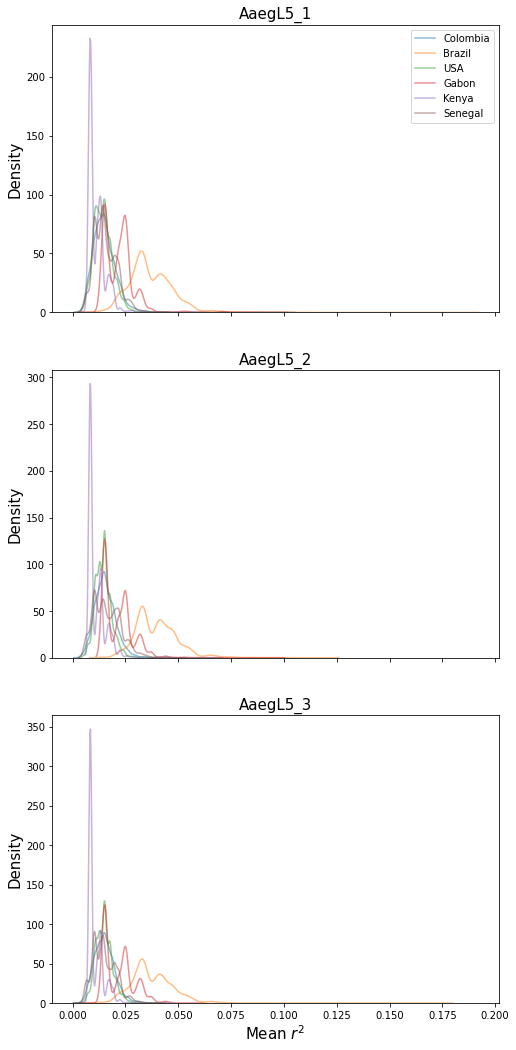

In [8]:
fig, axes = plt.subplots(nrows=3, figsize=(8, 18), sharex="col")

for i, (chrom, chrom_dict) in enumerate(ld_dict.items()):
    
    ax = axes[i]
    
    for country, df in chrom_dict.items():
                
        sns.kdeplot(data=df["r2"], ax=ax, label=country, alpha = 0.5)
        
    ax.set_title(chrom, fontsize=15)
    
    ax.set_xlabel("Mean $r^2$", fontsize=15)
    ax.set_ylabel("Density", fontsize=15)

axes[0].legend()
#plt.savefig(outString, bbox_inches="tight")